### Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
%matplotlib inline

### read csv file

In [26]:
train_df = pd.read_csv('train.csv')
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
test_df = pd.read_csv('test.csv')

In [28]:
df = train_df.append(test_df)

## Data Analysis

###### SalePrice Distribution:

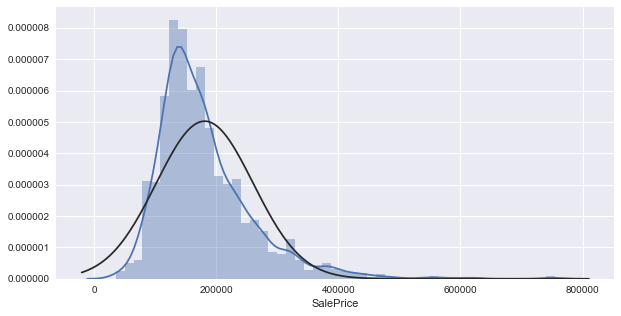

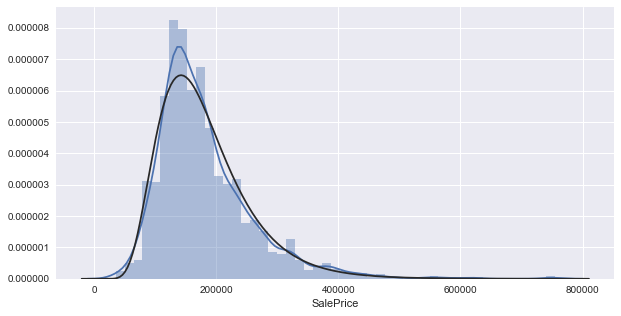

In [29]:
saleprice = train_df['SalePrice']
plt.figure(figsize = (10,5)); plt.title = 'Normal Distribution'
sns.distplot(saleprice, fit=st.norm)
plt.figure(figsize = (10,5)); plt.title = 'log Distribution'
sns.distplot(saleprice, fit=st.lognorm)

- From the 2 ditributions above, Sale Price seems to be fit better with log distribution.
- There are possible outliers need to be remove

###### Missing Data Overview:

Lets take a look at missing data and the percentage of missing data

In [30]:
Total = train_df.isnull().sum()
percent = np.round((((train_df.isnull().sum())/train_df.shape[0])*100),2)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent']).sort_values('Total', ascending=False)
missing_data[missing_data['Total']>0]

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


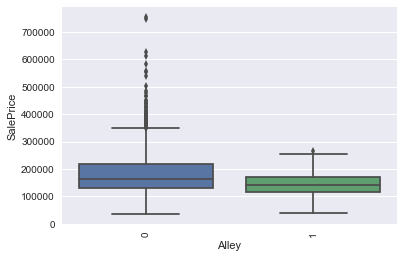

In [31]:
train_df.loc[(train_df['Alley'].notnull()),['Alley']] = 1
train_df.loc[(train_df['Alley'].isnull()),['Alley']] = 0
sns.boxplot(x=train_df['Alley'], y=train_df['SalePrice'])
x = plt.xticks(rotation = 90)

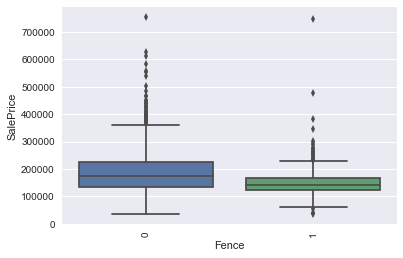

In [32]:
train_df.loc[(train_df['Fence'].notnull()),['Fence']] = 1
train_df.loc[(train_df['Fence'].isnull()),['Fence']] = 0
sns.boxplot(x=train_df['Fence'], y=train_df['SalePrice'])
x = plt.xticks(rotation = 90)

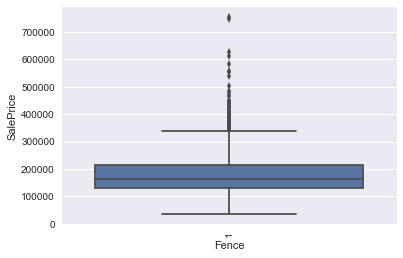

In [33]:
train_df.loc[(train_df['Fence'].notnull()),['Fence']] = 1
train_df.loc[(train_df['Fence'].isnull()),['Fence']] = 0
sns.boxplot(x=train_df['Fence'], y=train_df['SalePrice'])
x = plt.xticks(rotation = 90)

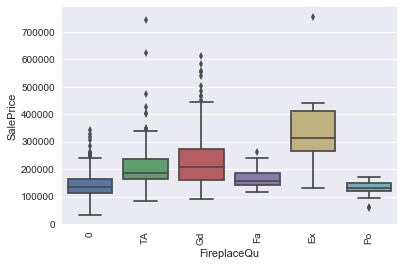

In [34]:
train_df.loc[(train_df['FireplaceQu'].isnull()),['FireplaceQu']] = 0
sns.boxplot(x=train_df['FireplaceQu'], y=train_df['SalePrice'])
x = plt.xticks(rotation = 90)

Combining the missing data table above with data dictionary, one can safely remove PoolQC, MiscFeature, 

###### Counting and Listing quantitative variables and qualitative variables:

In [35]:
category_var = []
numeric_var = []
category_var = [column for column in train_df.columns if  train_df.dtypes[column] == 'object']
numeric_var = [column for column in train_df.columns if train_df.dtypes[column] != 'object']

- From data dictionary, we can see that MSSubClass, OverallQual and OverallCond are actually a categorical varible.
- In addition, we need to remove id and SalePrice columns

In [36]:
category_var.append('MSSubClass')
category_var.append('OverallQual')
category_var.append('OverallCond')
numeric_var.remove('MSSubClass')
numeric_var.remove('OverallQual')
numeric_var.remove('OverallCond')
numeric_var.remove('SalePrice')
numeric_var.remove('Id')

print 'Number of category variable: ', len(category_var)
print 'Number of numeric variable: ', len(numeric_var)

Number of category variable:  46
Number of numeric variable:  33


###### Category Variable Analysis:

Convert catergory raw variable to pandas category type variable, this is for compatible purposes. Certain tasks works well if the data type is category

In [37]:
for element in category_var:
    train_df[element] = train_df[element].astype('category')
    if train_df[element].isnull().any():
        train_df[element] = train_df[element].cat.add_categories(['MISSING'])
        train_df[element] = train_df[element].fillna('MISSING')

Boxplot for all category variables:

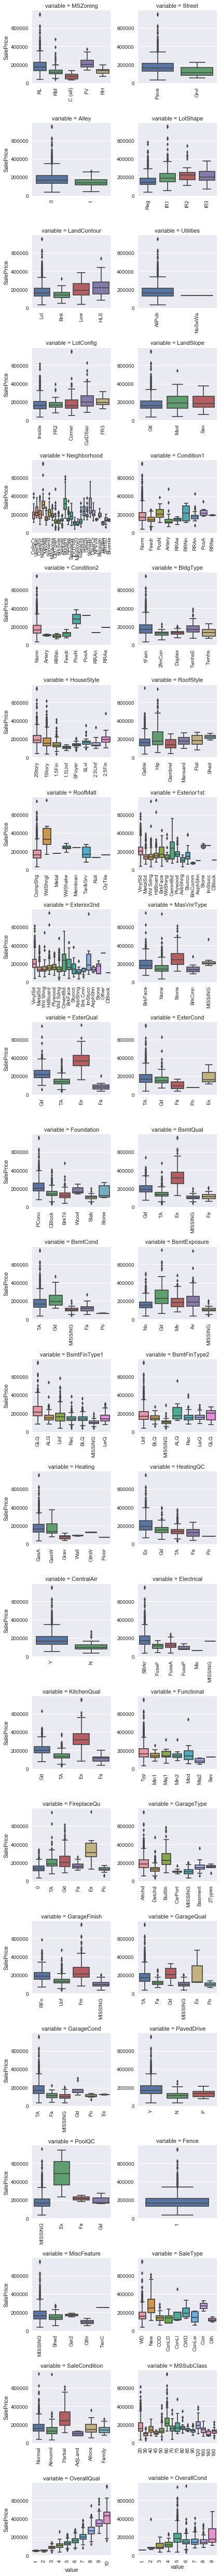

In [38]:
def boxplot(x,y, **kawrgs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation = 90)

data = pd.melt(train_df, id_vars='SalePrice', value_vars=category_var)
g = sns.FacetGrid(data, col = 'variable', col_wrap=2, sharex= False, sharey= False)
g = g.map(boxplot, 'value', 'SalePrice')

In [39]:
#Some Comments

Determine the significance of each category variables:

In [40]:
def anova(frame):
    pvals = []
    anv = pd.DataFrame()
    anv['feature'] = category_var
    for col in category_var:
        samples = []
        for element in frame[col].unique():
            s = frame[frame[col] == element]['SalePrice'].values
            samples.append(s)
        pval = st.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')


C:\Anaconda2\lib\site-packages\scipy\stats\stats.py:2966: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / float(dfbn)
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  


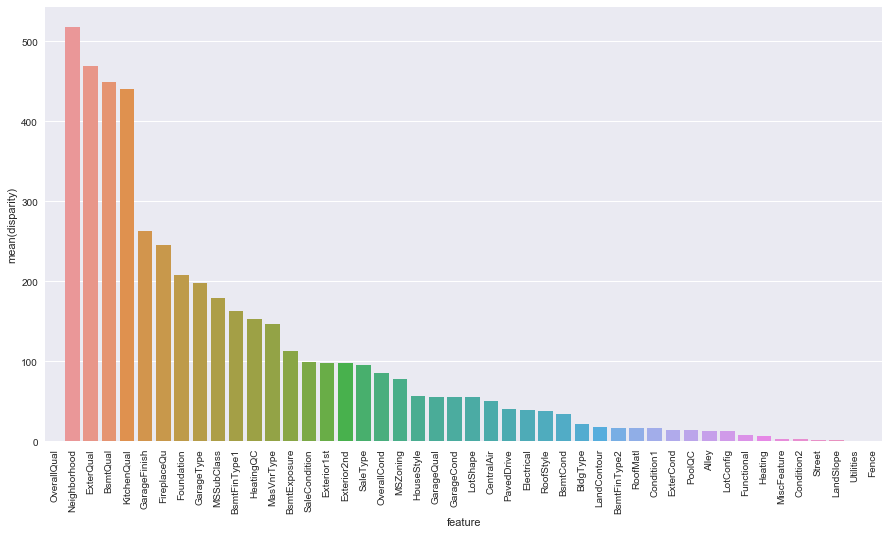

In [41]:
a = anova(train_df)
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(figsize=(15,8))
sns.barplot(data = a, x ='feature', y = 'disparity')
x = plt.xticks(rotation=90)

    This is ANOVA test, it is the Analysis Of Variance.
    This Chart basically showed the variance for each variables based SalePrice aka how much does the variable change the SalePrice
    From the Chart, you can see that Neighborhood is a significant factor which make sense since in  real estate, location is one of the most important factor
    List of variable candidate for removing:
        - Ultilities
        - LandSlope
        - Street
        - Condition2
        - MiscFeature
        - Heating
        - Functional
        - LotConfig
        - PoolQC
        - ExterCond

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E', 'MSSubClass_E', 'OverallQual_E', 'OverallCond_E']


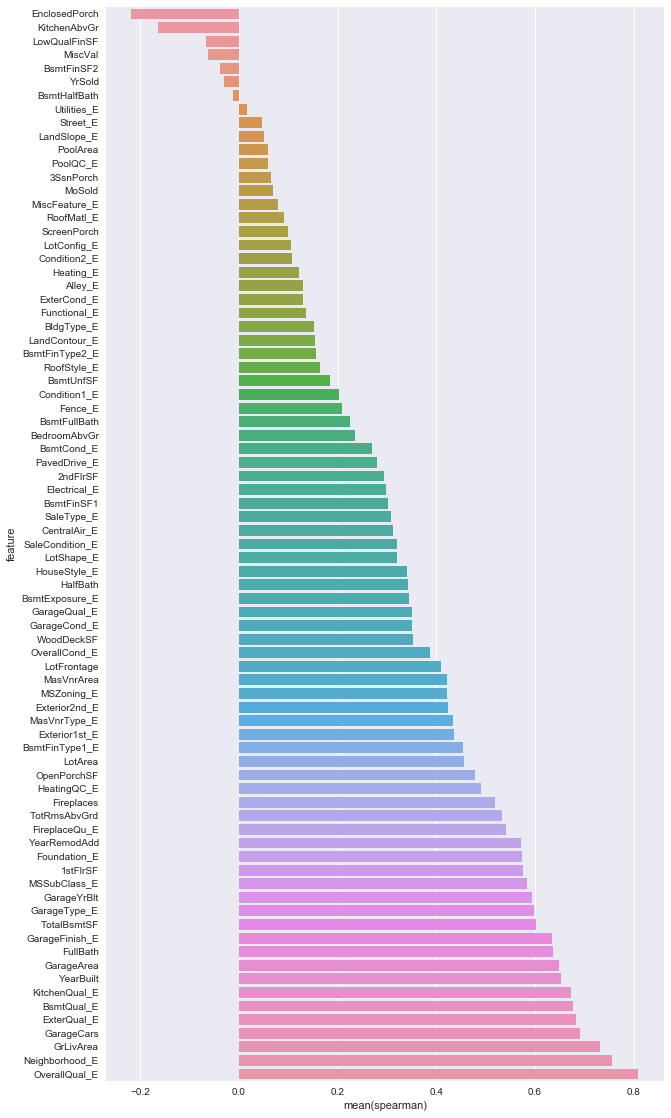

In [76]:
#Ordering columns based on the significant
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in category_var:  
    encode(train_df, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(10, 0.25*len(features)))
    sns.barplot(data = spr, x = 'spearman', y= 'feature', orient='h')
features = numeric_var + qual_encoded
spearman(train_df, features)

Spearman distribution is used to determine the relation when they are not linear

###### Numeric Variable Analysis:

Corellation Matrix:

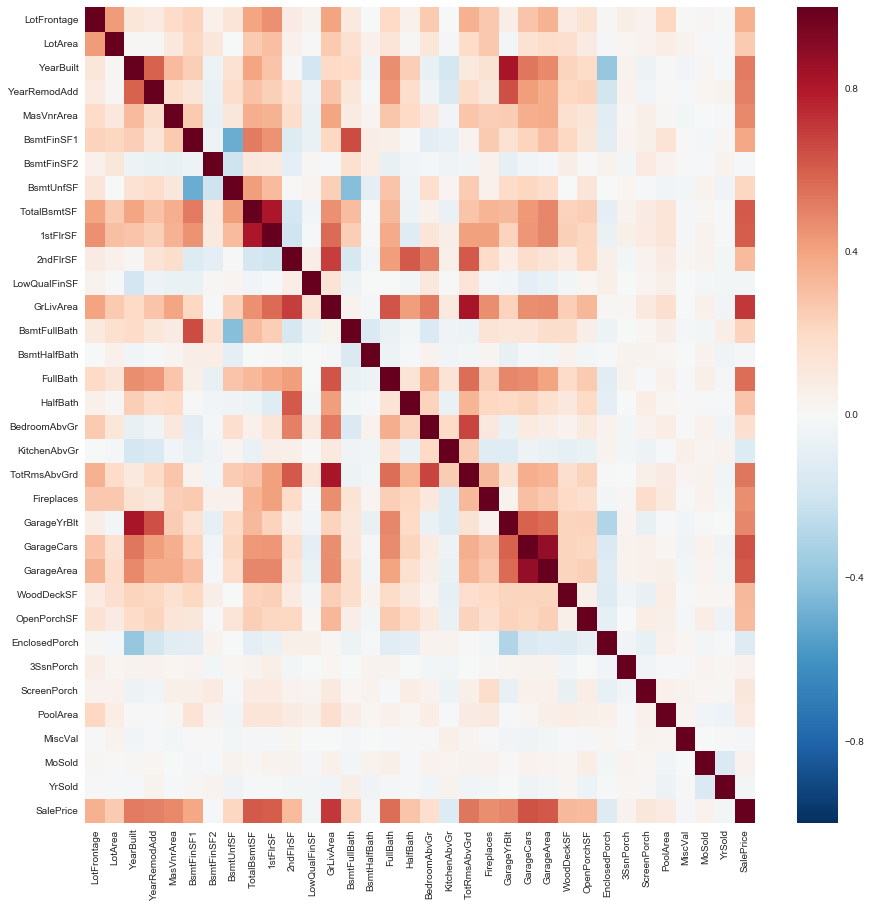

In [32]:
corr = train_df[numeric_var + ['SalePrice']].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr)

There are some correlation between SalePrice and numeric variables

###### Creating  boundary to see diffrence between variables and SalePrice

In [139]:
boundary = np.exp(np.log(train_df['SalePrice']).median())
boundary

163000.00000000012

In [136]:
saleprice_low = train_df[train_df['SalePrice']<boundary]
saleprice_high = train_df[train_df['SalePrice']>boundary]

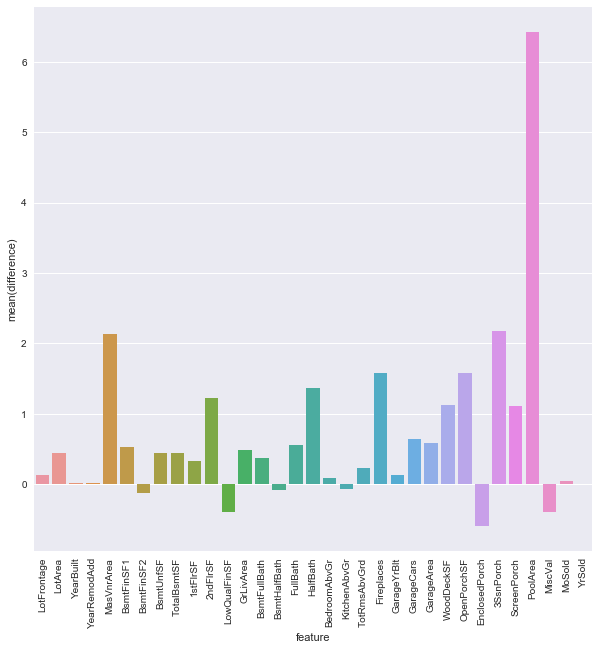

In [140]:
data = pd.DataFrame()
data['feature'] = numeric_var
data['difference'] = [(saleprice_high[f].fillna(0.).mean() - saleprice_low[f].fillna(0.).mean())/(saleprice_low[f].fillna(0.).mean()) for f in numeric_var]
plt.figure(figsize=(10,10))
sns.barplot(data=data, x='feature', y='difference')
x=plt.xticks(rotation=90)

In [138]:
data[data['difference']>1]

,feature,difference
4,MasVnrArea,2.137880
10,2ndFlrSF,1.227779
16,HalfBath,1.360203
20,Fireplaces,1.579835
24,WoodDeckSF,1.124169
25,OpenPorchSF,1.572749
27,3SsnPorch,2.172595
28,ScreenPorch,1.113397
29,PoolArea,6.432280


In [ ]:
These features above are features that showed the biggest differences between SalePrice Boundary

List of Things need to be done:
    - SalePrice Log
    - Data Cleaning
    - Feature Engineer
    - Modeling
    - Model Stacking